In [1]:
# From https://github.com/dask/dask-examples/blob/master/delayed.ipynb

In [5]:
import dask

print(dask.__version__)

1.1.1


In [8]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

Client Scheduler: tcp://127.0.0.1:61935 Dashboard: http://127.0.0.1:61936/status,Cluster Workers: 1 Cores: 4 Memory: 8.59 GB


In [9]:
from dask.threaded import get

from operator import add

dsk = {'x': 1,
       'y': 2,
       'z': (add, 'x', 'y'),
       'w': (sum, ['x', 'y', 'z'])}

get(dsk, 'x')

1

## Work counting

In [15]:


def print_and_return(string):
    #print(string)
    return string

def format_str(count, val, nwords):
    return ('word list has {0} occurrences of {1}, '
            'out of {2} words').format(count, val, nwords)

dsk = {'words': 'apple orange apple pear orange pear pear',
       'nwords': (len, (str.split, 'words')),
       'val1': 'orange',
       'val2': 'apple',
       'val3': 'pear',
       'count1': (str.count, 'words', 'val1'),
       'count2': (str.count, 'words', 'val2'),
       'count3': (str.count, 'words', 'val3'),
       'out1': (format_str, 'count1', 'val1', 'nwords'),
       'out2': (format_str, 'count2', 'val2', 'nwords'),
       'out3': (format_str, 'count3', 'val3', 'nwords'),
       'print1': (print_and_return, 'out1'),
       'print2': (print_and_return, 'out2'),
       'print3': (print_and_return, 'out3')}

from dask.threaded import get

outputs = ['print1', 'print2']
results = get(dsk, outputs)

results

('word list has 2 occurrences of orange, out of 7 words',
 'word list has 2 occurrences of apple, out of 7 words')

In [ ]:
dsk = 

In [67]:
_VALID_ACTIONS_META = [
    ("basic_hygiene", "w"),
    ("yapf", "w"),
    ("autoflake", "w"),
    ("isort",  "w"),
    ("pyment", "w"),
    ("fix_jupytext", "w"),
    ("ipynb_format", "w"),
    #
    ("pylint", "r"),
    ("check_jupytext", "r"),
    ("flake8", "r"),
    ("pydocstyle", "r"),
]


_VALID_ACTIONS = list(zip(*_VALID_ACTIONS_META))[0]

_IS_WRITE = {k: (v == "w") for k, v in _VALID_ACTIONS_META}
#print(_IS_WRITE)

_ALL_ACTIONS = [
    "basic_hygiene",
    "autoflake",
    "isort",
    "yapf",
    # Disabled because of "import configparser" error.
    #"flake8",
    "pydocstyle",
    "pylint",
    "ipynb_format",
    "fix_jupytext",
]


actions = _ALL_ACTIONS[:]
# Reorder actions according to _VALID_ACTIONS.
actions_tmp = []
for action in _VALID_ACTIONS:
    if action in actions:
        actions_tmp.append(action)
actions = actions_tmp
print(("actions=%s" % actions))


files = "f1 f2 f3".split()


import collections
import pprint
dsk = collections.OrderedDict()


def debug_dask(*args, **kwargs):
    print(("%s" % str(args)))


f = "f1"
dep = 1
out_nodes = []
for a in actions:
    if a == actions[0]:
        dep_as_str = None
    else:
        if _IS_WRITE[a]:
            dep_as_str = "dep-%d" % (dep - 1)
    #node = (debug_dask, a, f, dep_as_str)
    #node = (a, f, dep_as_str)
    out_dep = "dep-%d" % dep
    dsk[out_dep] = node
    if not _IS_WRITE[a]:
        out_nodes.append(out_dep)
    dep += 1
    
print(("out_nodes=%s" % str(out_nodes)))

for k, v in dsk.items():
    print((str(k), str(v)))
         
#print(pprint.pformat(dsk))

from dask.threaded import get

#get(dsk, out_nodes)

actions=['basic_hygiene', 'yapf', 'autoflake', 'isort', 'fix_jupytext', 'ipynb_format', 'pylint', 'pydocstyle']
out_nodes=['dep-7', 'dep-8']
dep-1 (<function debug_dask at 0x1199312a8>, 'basic_hygiene', 'f1', None)
dep-2 (<function debug_dask at 0x1199312a8>, 'yapf', 'f1', 'dep-1')
dep-3 (<function debug_dask at 0x1199312a8>, 'autoflake', 'f1', 'dep-2')
dep-4 (<function debug_dask at 0x1199312a8>, 'isort', 'f1', 'dep-3')
dep-5 (<function debug_dask at 0x1199312a8>, 'fix_jupytext', 'f1', 'dep-4')
dep-6 (<function debug_dask at 0x1199312a8>, 'ipynb_format', 'f1', 'dep-5')
dep-7 (<function debug_dask at 0x1199312a8>, 'pylint', 'f1', 'dep-5')
dep-8 (<function debug_dask at 0x1199312a8>, 'pydocstyle', 'f1', 'dep-5')


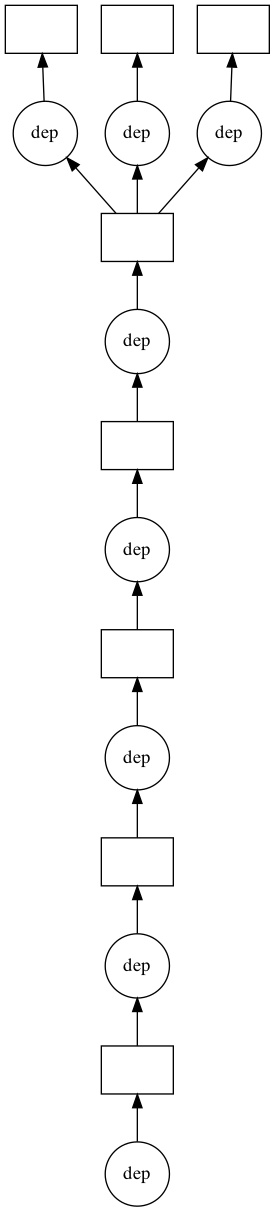

In [68]:
dask.visualize(dsk)